# Обработка, очистка, визуализация.

## Библиотеки

In [71]:
import pandas as pd
import numpy as np
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [1]:
data = pd.read_csv('data.csv')
data.head()

Unnamed: 0  Bal  Brick       Dist  District  Floor  Kitsp  \
0           0    1      1   1.809153         0      4   23.0   
1           1    1      1   3.454335         0      6   37.4   
2           2    1      1   2.185383         0      7   13.0   
3           3    1      1  29.427101         0      2    8.0   
4           4    1      1  21.499467         0      2   11.8   

                                      Link  Livesp  Metrdist  N  New  Nfloor  \
0  http://www.cian.ru/sale/flat/147726561/    95.0       7.0  0    0     8.0   
1  http://www.cian.ru/sale/flat/149818595/    45.0       9.0  1    0    14.0   
2  http://www.cian.ru/sale/flat/150674314/    69.0       6.0  2    0     8.0   
3  http://www.cian.ru/sale/flat/151894585/    15.8      20.0  3    1     4.0   
4  http://www.cian.ru/sale/flat/151575879/    36.6      15.0  4    1    19.0   

      Price Rooms  Tel  Totsp  Walk  
0  71014225     3  1.0  118.0   1.0  
1  85000000     3  1.0  114.1   1.0  
2  55000000     3  NaN  124.0   1.0  
3   2316750     1  NaN   30.9   0.0  
4   3650000     2  NaN   73.8   0.0

In [3]:
data.describe()

Unnamed: 0          Bal        Brick         Dist    District  \
count  7560.00000  7560.000000  7560.000000  7560.000000  7560.00000   
mean   3779.50000     0.894444     0.467460    13.718571     4.00000   
std    2182.52835     0.307288     0.498973     7.543593     2.58216   
min       0.00000     0.000000     0.000000     1.090926     0.00000   
25%    1889.75000     1.000000     0.000000     8.859065     2.00000   
50%    3779.50000     1.000000     0.000000    13.176035     4.00000   
75%    5669.25000     1.000000     1.000000    17.502847     6.00000   
max    7559.00000     1.000000     1.000000    68.721127     8.00000   

             Floor        Kitsp        Livesp     Metrdist           N  \
count  7560.000000  6294.000000   6847.000000  6840.000000  7560.00000   
mean      7.381481     9.350858     36.223003    10.860380  3779.50000   
std       6.219364     4.145192    509.246758     6.176188  2182.52835   
min       1.000000     1.000000      4.000000     1.000000     0.00000   
25%       3.000000     6.500000     19.000000     6.000000  1889.75000   
50%       5.000000     8.900000     27.000000    10.000000  3779.50000   
75%      10.000000    10.400000     34.400000    15.000000  5669.25000   
max      45.000000    60.700000  42139.000000    54.000000  7559.00000   

               New       Nfloor         Price          Tel        Totsp  \
count  7560.000000  7473.000000  7.560000e+03  3589.000000  7560.000000   
mean      0.316931    14.515991  1.016860e+07     0.687378    50.776720   
std       0.465311     8.562876  1.642633e+07     0.463626    25.719036   
min       0.000000     1.000000  6.800000e+03     0.000000    11.000000   
25%       0.000000     9.000000  5.600000e+06     0.000000    37.700000   
50%       0.000000    13.000000  7.300000e+06     1.000000    44.400000   
75%       1.000000    18.000000  9.790000e+06     1.000000    57.000000   
max       1.000000    77.000000  4.507860e+08     1.000000   551.700000   

              Walk  
count  6840.000000  
mean      0.681871  
std       0.465784  
min       0.000000  
25%       0.000000  
50%       1.000000  
75%       1.000000  
max       1.000000

## Не до конца заполненные поля

In [17]:
data.describe().T['count'][data.describe().T['count']!=data.shape[0]]

Kitsp       6294.0
Livesp      6847.0
Metrdist    6840.0
Nfloor      7473.0
Tel         3589.0
Walk        6840.0
Name: count, dtype: float64

### Количество квартир с полными данными

In [8]:
data[data.Kitsp==data.Kitsp][data.Livesp==data.Livesp][data.Metrdist==data.Metrdist][data.Nfloor==data.Nfloor][data.Tel==data.Tel][data.Walk==data.Walk].shape

/home/uzd/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':


(3177, 18)

### Если рассматривать только квартиры с полными данными, утеряется наибольшая часть информации. Попробуем оставить с не более чем одним не до конца заполненным полем.

In [9]:
data[data.Livesp==data.Livesp][data.Metrdist==data.Metrdist][data.Nfloor==data.Nfloor][data.Tel==data.Tel][data.Walk==data.Walk].shape

/home/uzd/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':


(3309, 18)

In [10]:
data[data.Kitsp==data.Kitsp][data.Metrdist==data.Metrdist][data.Nfloor==data.Nfloor][data.Tel==data.Tel][data.Walk==data.Walk].shape

/home/uzd/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':


(3180, 18)

In [11]:
data[data.Kitsp==data.Kitsp][data.Livesp==data.Livesp][data.Nfloor==data.Nfloor][data.Tel==data.Tel][data.Walk==data.Walk].shape

/home/uzd/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':


(3177, 18)

In [12]:
data[data.Kitsp==data.Kitsp][data.Livesp==data.Livesp][data.Metrdist==data.Metrdist][data.Tel==data.Tel][data.Walk==data.Walk].shape

/home/uzd/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':


(3177, 18)

In [13]:
data[data.Kitsp==data.Kitsp][data.Livesp==data.Livesp][data.Metrdist==data.Metrdist][data.Nfloor==data.Nfloor][data.Walk==data.Walk].shape

/home/uzd/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':


(5757, 18)

In [14]:
data[data.Kitsp==data.Kitsp][data.Livesp==data.Livesp][data.Metrdist==data.Metrdist][data.Nfloor==data.Nfloor][data.Tel==data.Tel].shape

/home/uzd/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':


(3177, 18)

In [63]:
data_cleaned = data[data.Kitsp==data.Kitsp][data.Livesp==data.Livesp][data.Metrdist==data.Metrdist][data.Nfloor==data.Nfloor][data.Walk==data.Walk].drop(['Link', 'N', 'Unnamed: 0'], 1)
data_cleaned.columns

/home/uzd/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':


Index(['Bal', 'Brick', 'Dist', 'District', 'Floor', 'Kitsp', 'Livesp',
       'Metrdist', 'New', 'Nfloor', 'Price', 'Rooms', 'Tel', 'Totsp', 'Walk'],
      dtype='object')

In [64]:
data_cleaned.dtypes

Bal           int64
Brick         int64
Dist        float64
District      int64
Floor         int64
Kitsp       float64
Livesp      float64
Metrdist    float64
New           int64
Nfloor      float64
Price         int64
Rooms        object
Tel         float64
Totsp       float64
Walk        float64
dtype: object

### Бинарные переменные: Bal, Brick, New, Walk, Tel(Иногда отсутствует)
### Целочисленные: Floor, Metrdist, Nfloor, Rooms(надо выяснить, почему там тип object)
### Категориальные: District
### Вещественные: Dist, Kitsp, Livesp, Totsp
### Целевая: Price

In [65]:
bincols = ['Bal', 'Brick', 'New', 'Walk', 'Tel']
intcols = ['Floor', 'Metrdist', 'Nfloor', 'Rooms']
catcols = ['District']
floatcols = ['Dist', 'Kitsp', 'Livesp', 'Totsp']

In [66]:
data_cleaned.Rooms.value_counts()

1                                               2586
2                                               2122
3                                                887
4                                                103
студия                                            27
5                                                 10
свободнаяпланировка                                3
студиявЖК«ПримаПарк»                               2
свободнаяпланировкавЖК«Кант»                       2
свободнаяпланировкавЖК«TWEEDPARK(ТвидПарк)»        1
студиявЖК«ТатьянинПарк»                            1
свободнаяпланировкавЖК«ДомвСокольниках»            1
студиявЖК«Домашний»                                1
студиявЖК«Санрайс»                                 1
студиявЖК«ЭталонСити»                              1
студиявЖК«Only(Онли)»                              1
свободнаяпланировкавЖК«АлыеПаруса»                 1
свободнаяпланировкавЖК«Триколор»                   1
свободнаяпланировкавЖК«Welltonpark»           

In [67]:
print(data_cleaned[data_cleaned.Rooms==data_cleaned.Rooms].shape==data_cleaned.shape) #Это - причина, по которой имеет место следующая строчка
data_cleaned = data_cleaned[data_cleaned.Rooms==data_cleaned.Rooms]

False


In [68]:
def room(r):
    if r.isdigit():
        return int(r)
    if 'свободная' in r:
        return 6
    return 7
data_cleaned.Rooms = data_cleaned.Rooms.apply(room)

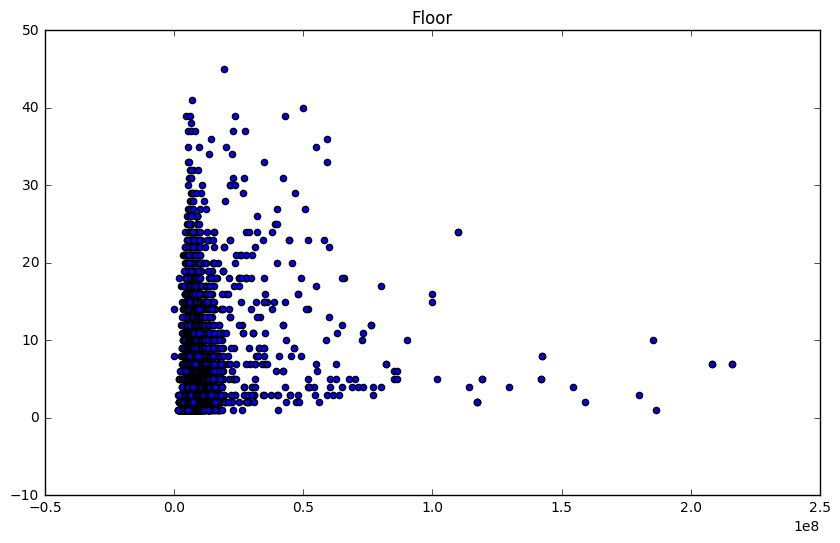

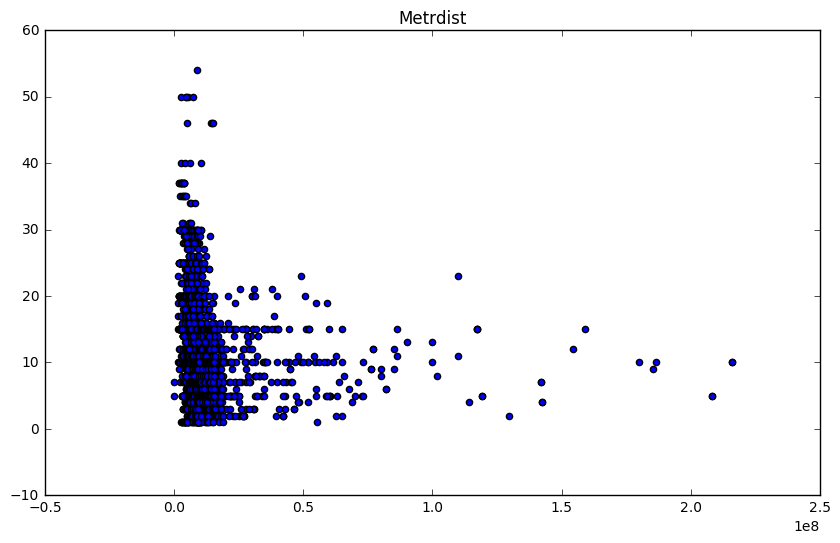

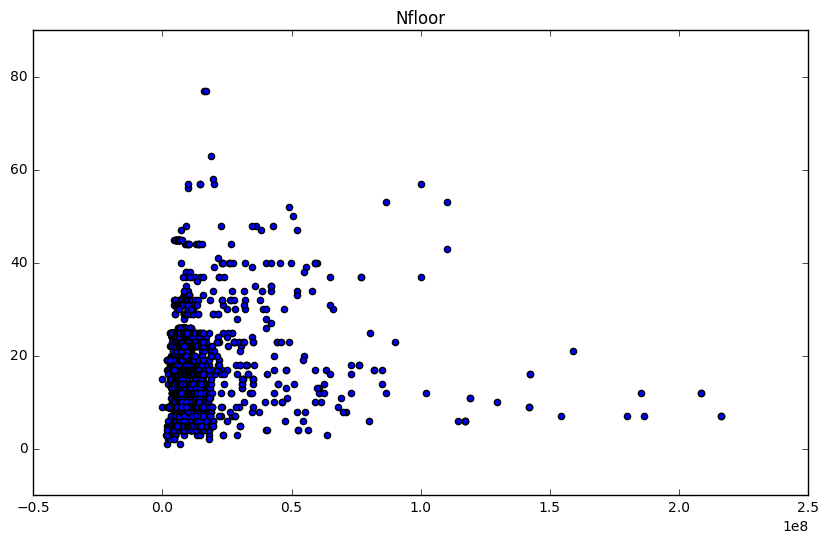

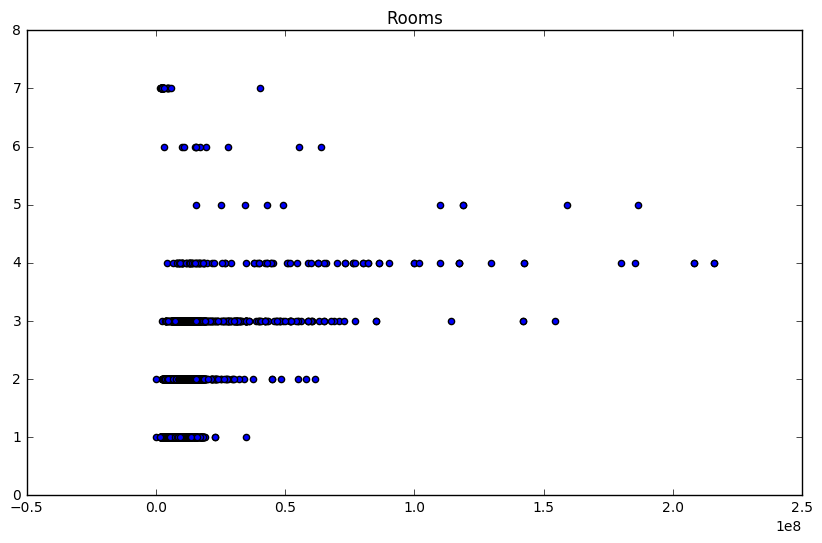

In [69]:
for colname in intcols:
    pylab.figure(figsize = (10, 6))
    pylab.scatter(data_cleaned.Price, data_cleaned[colname])
    pylab.title(colname)

## Возможно, логарифмический масштаб будет более содержательным

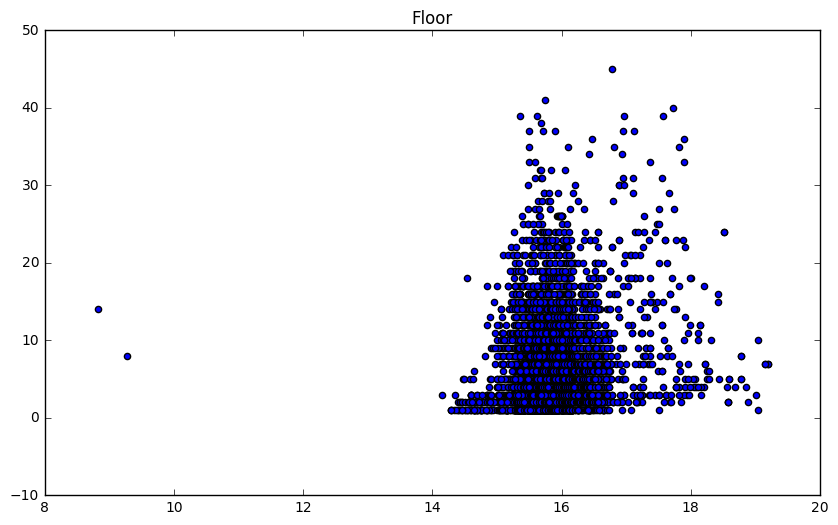

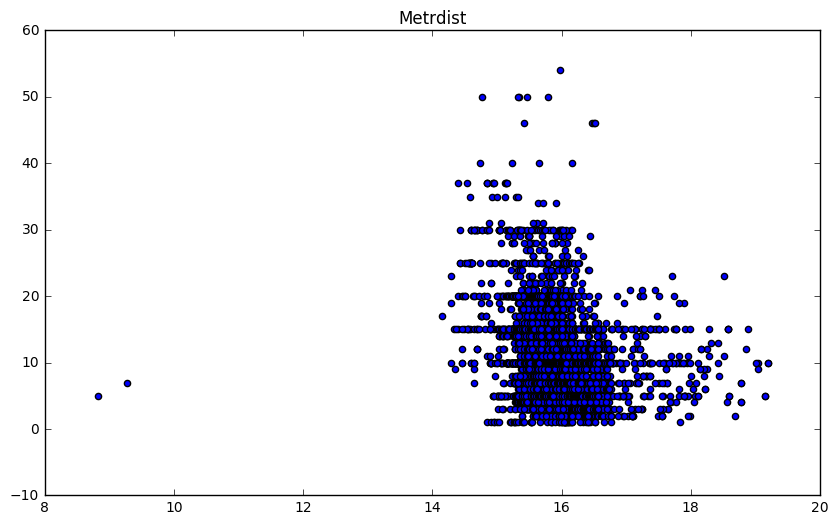

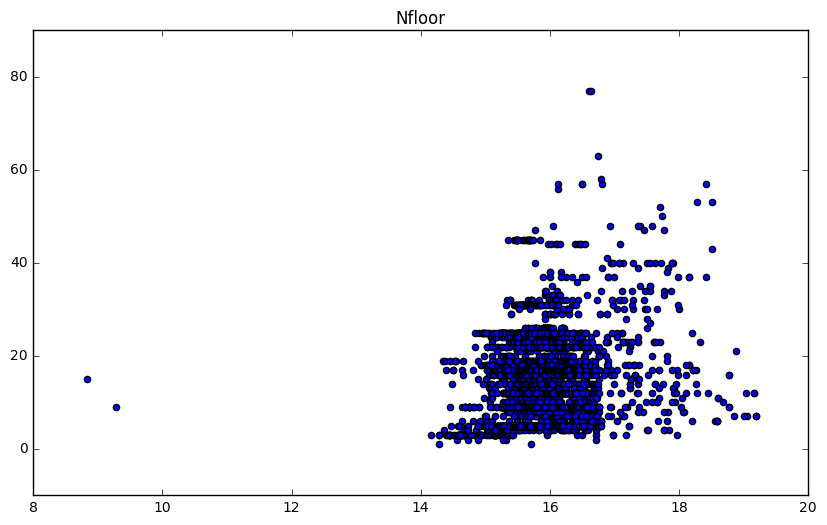

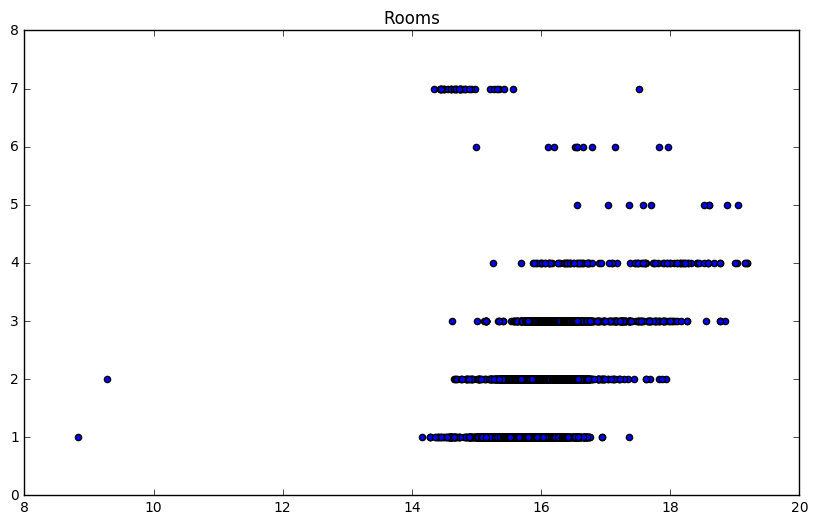

In [73]:
for colname in intcols:
    pylab.figure(figsize = (10, 6))
    pylab.scatter(data_cleaned.Price.apply(np.log), data_cleaned[colname])
    pylab.title(colname)

### Видна пара аномалий

In [80]:
data_cleaned.Price[data_cleaned.Price.apply(np.log)<10]

4203    10700
5043     6800
Name: Price, dtype: int64

In [ ]:
print(data.Link[4203])
print(data.Link[5043])

### Скорее всего, просто забыли по три нуля. На всякий случай эти данные выкинем.

In [81]:
data_cleaned = data_cleaned[data_cleaned.Price.apply(np.log)>10]

### Теперь уже можно более внимательно смотреть на зависимость цены от целочисленных признаков

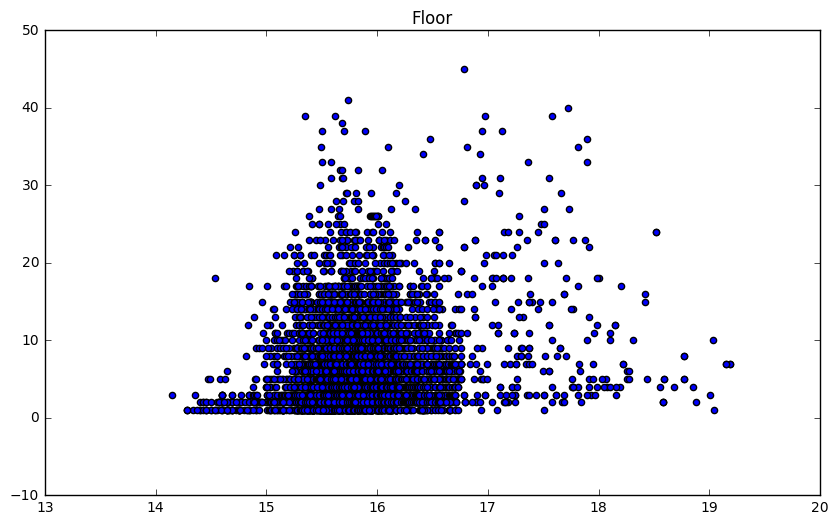

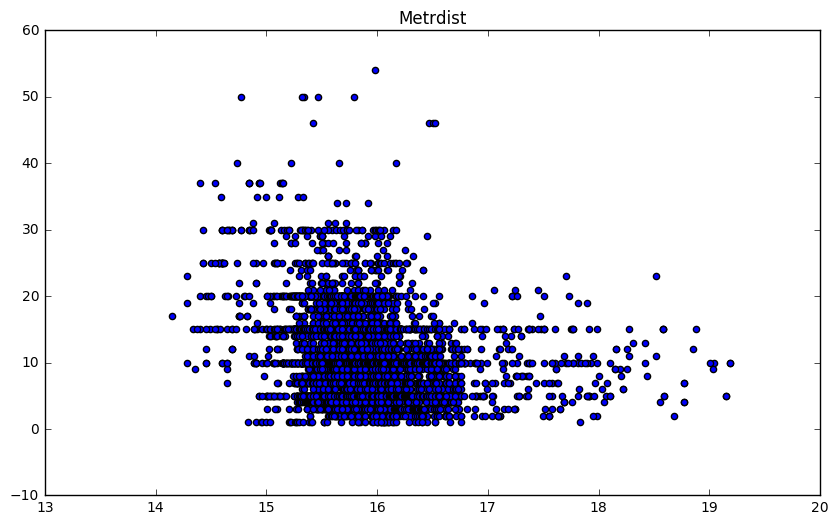

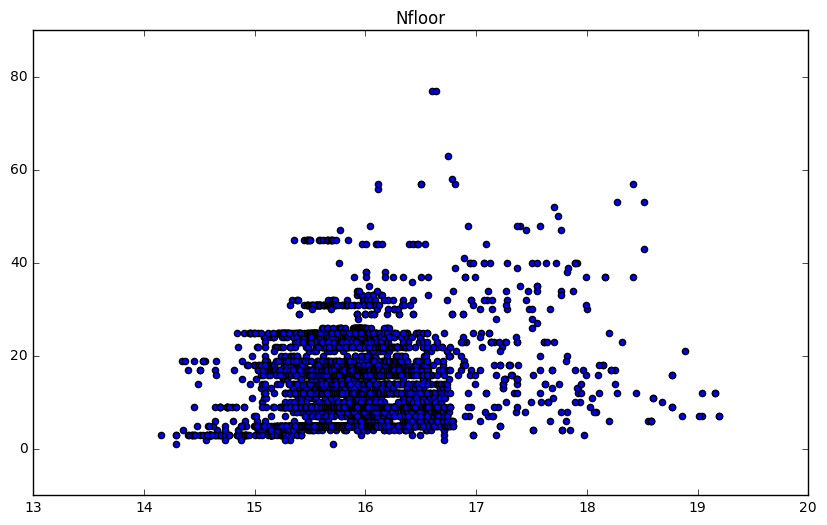

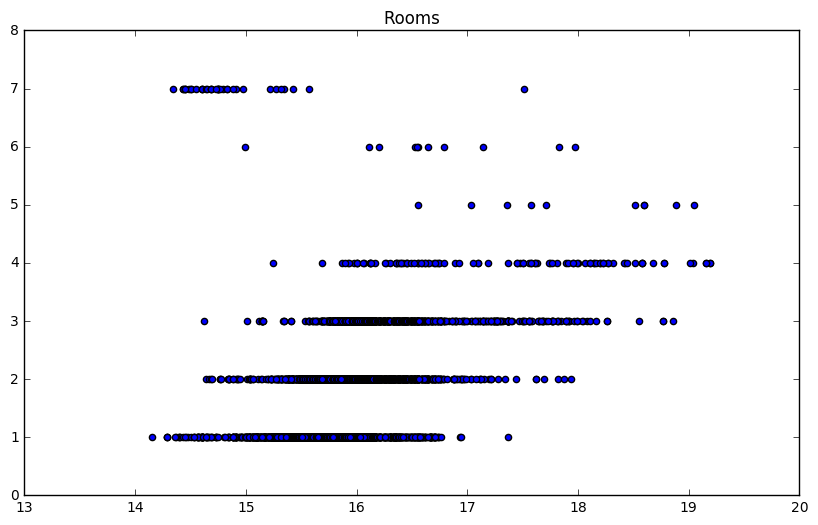

In [82]:
for colname in intcols:
    pylab.figure(figsize = (10, 6))
    pylab.scatter(data_cleaned.Price.apply(np.log), data_cleaned[colname])
    pylab.title(colname)

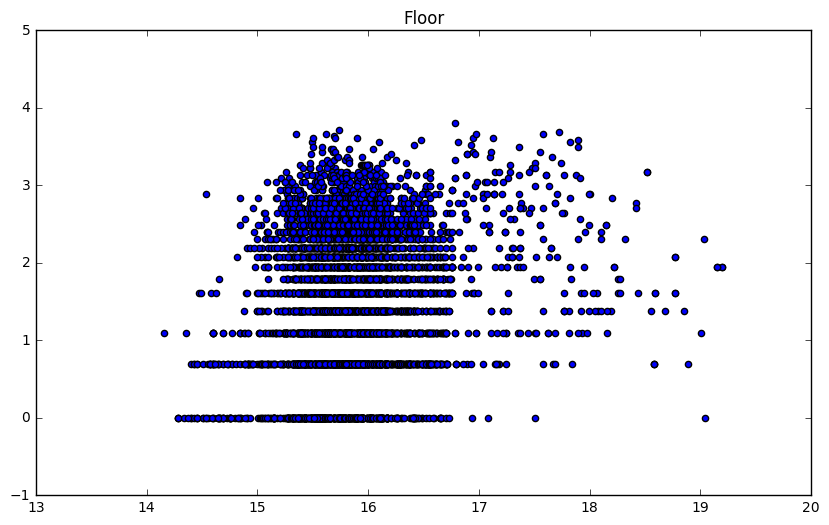

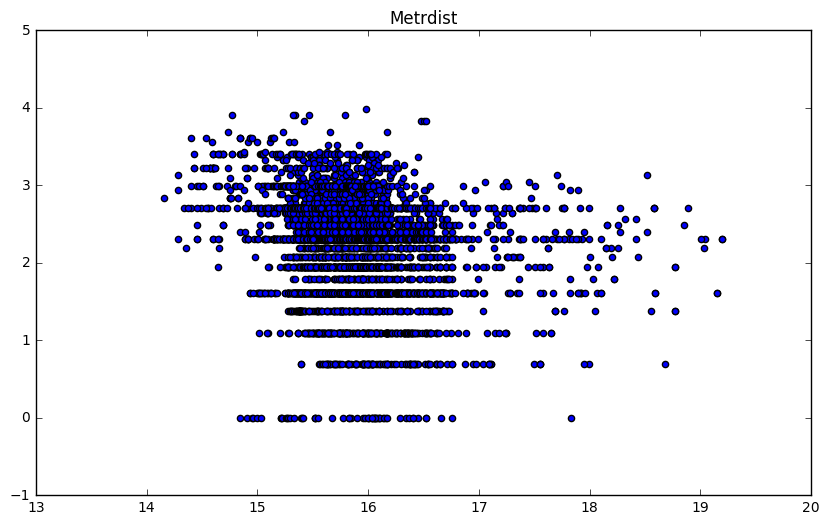

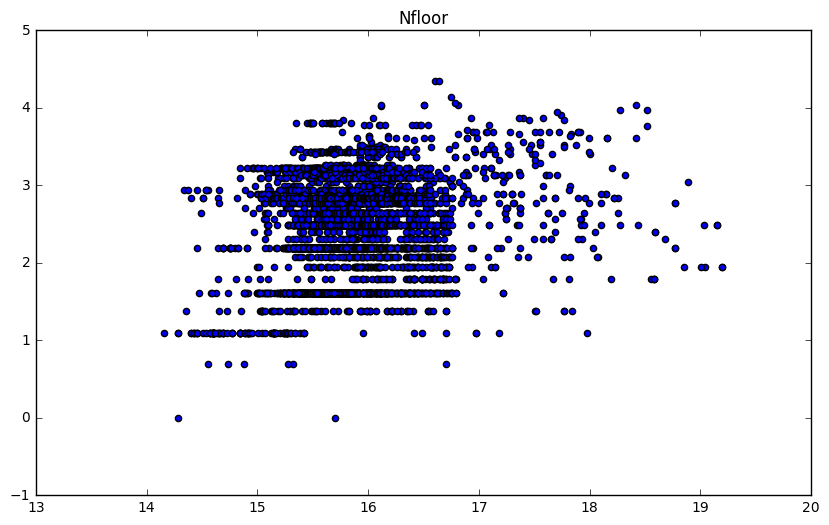

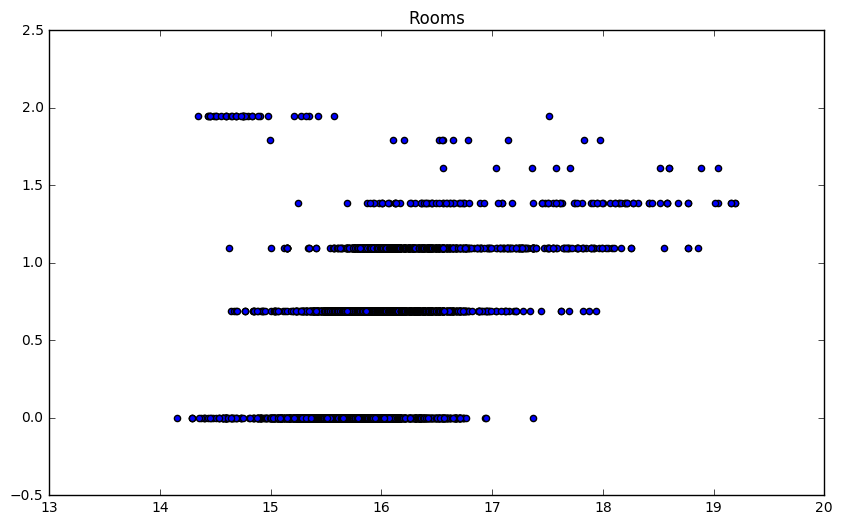

In [83]:
for colname in intcols:
    pylab.figure(figsize = (10, 6))
    pylab.scatter(data_cleaned.Price.apply(np.log), data_cleaned[colname].apply(np.log))
    pylab.title(colname)

##  Теперь вещественные признаки

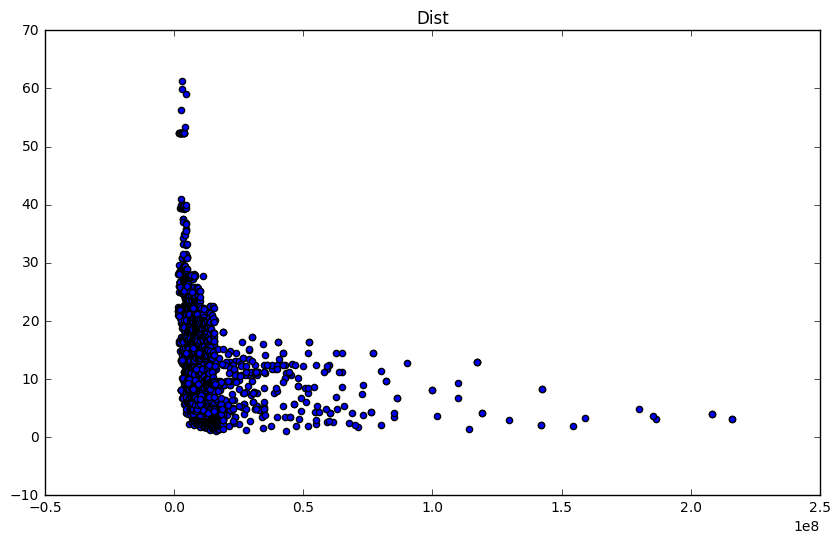

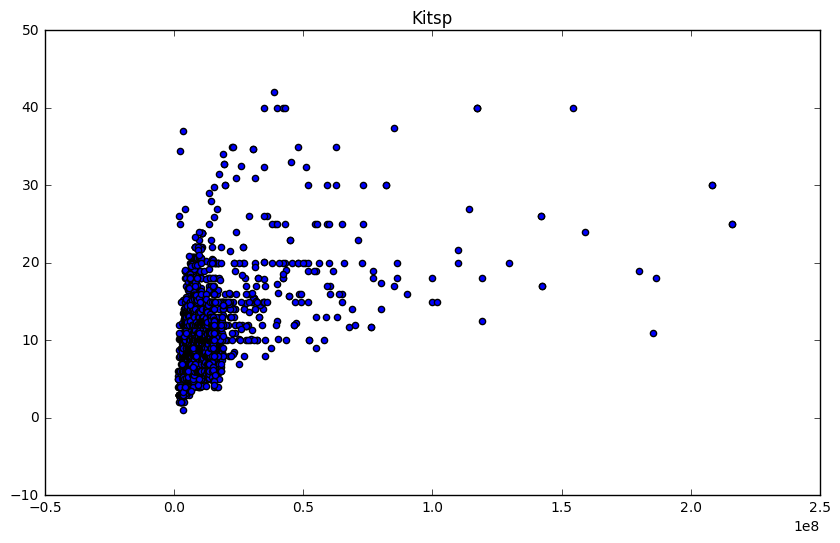

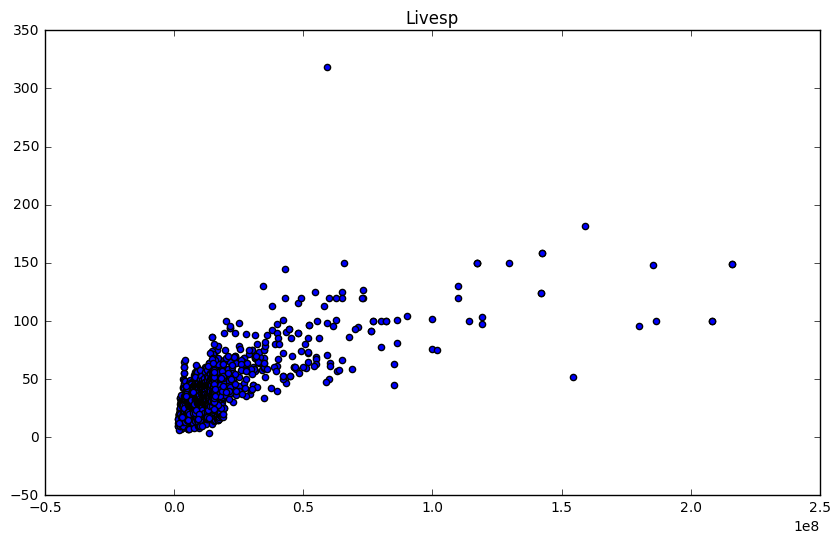

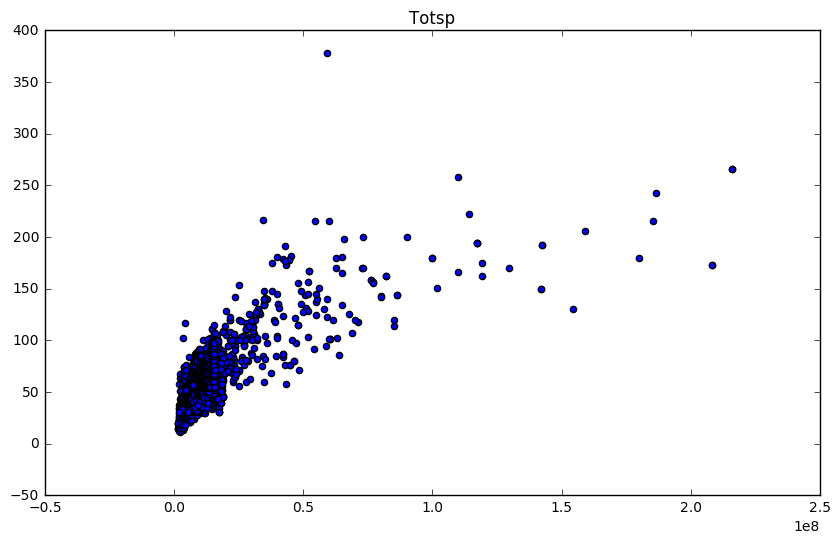

In [85]:
for colname in floatcols:
    pylab.figure(figsize = (10, 6))
    pylab.scatter(data_cleaned.Price, data_cleaned[colname])
    pylab.title(colname)

### Красиво и содержательно, но не очень. Логарифмируем.

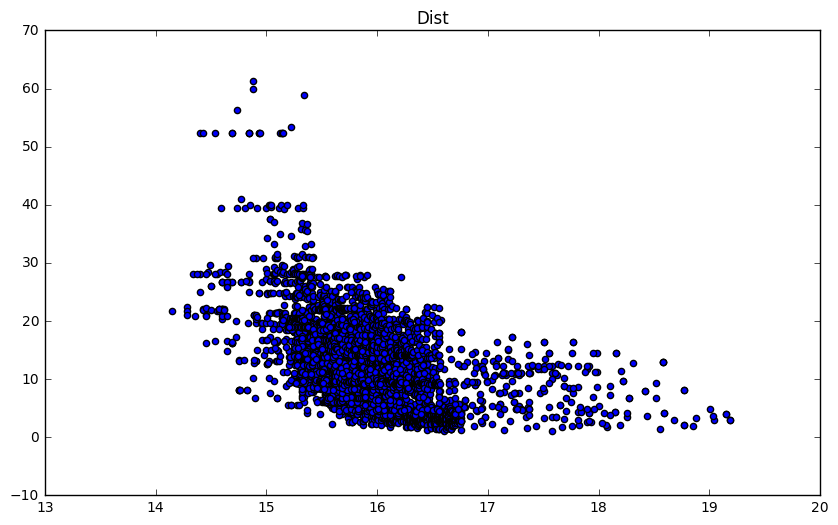

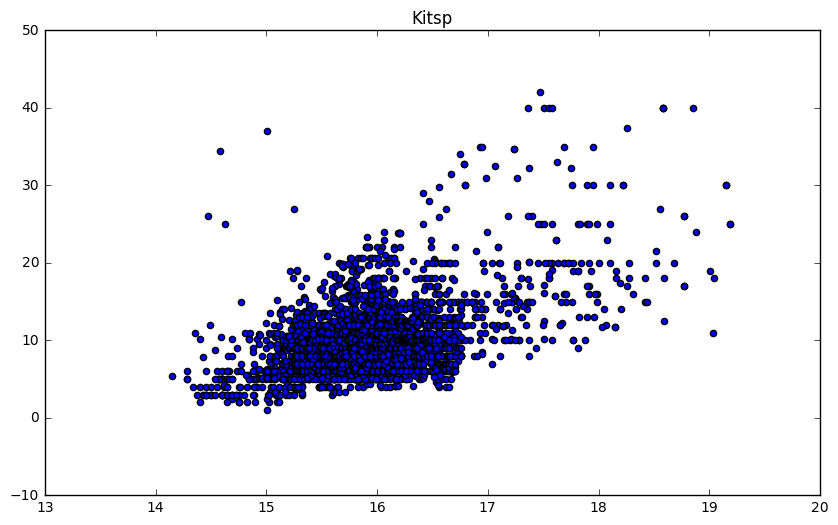

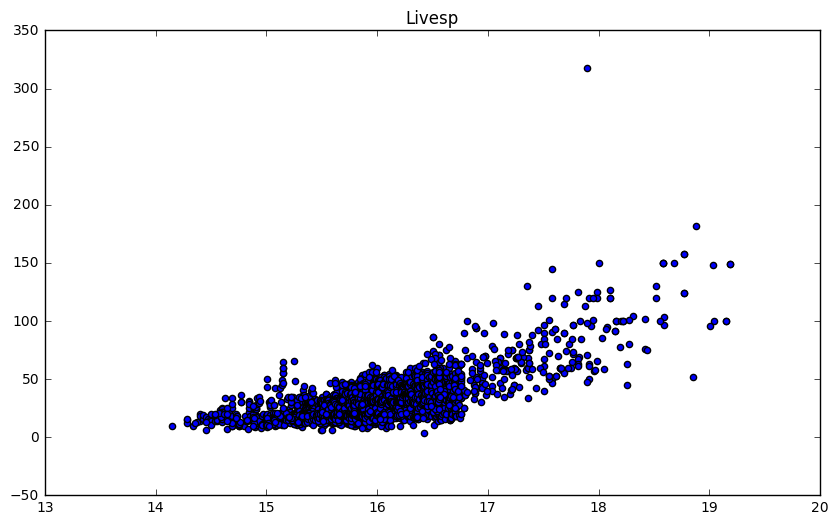

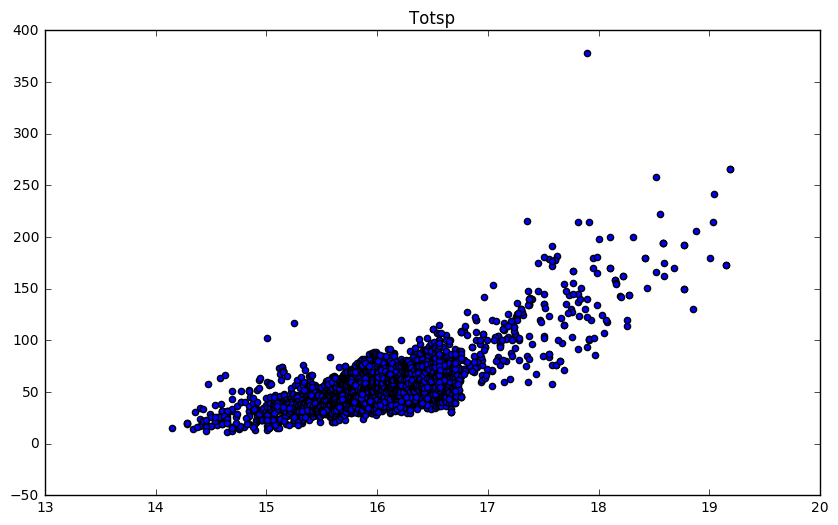

In [84]:
for colname in floatcols:
    pylab.figure(figsize = (10, 6))
    pylab.scatter(data_cleaned.Price.apply(np.log), data_cleaned[colname])
    pylab.title(colname)

### И по второй оси.

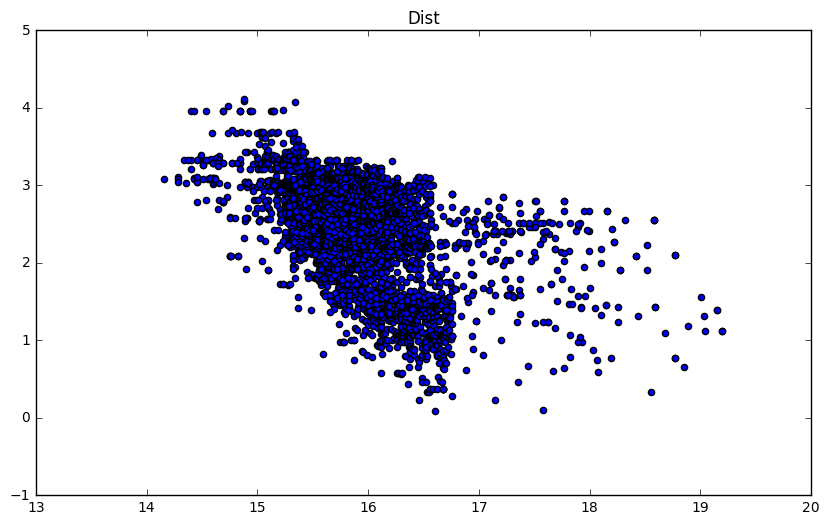

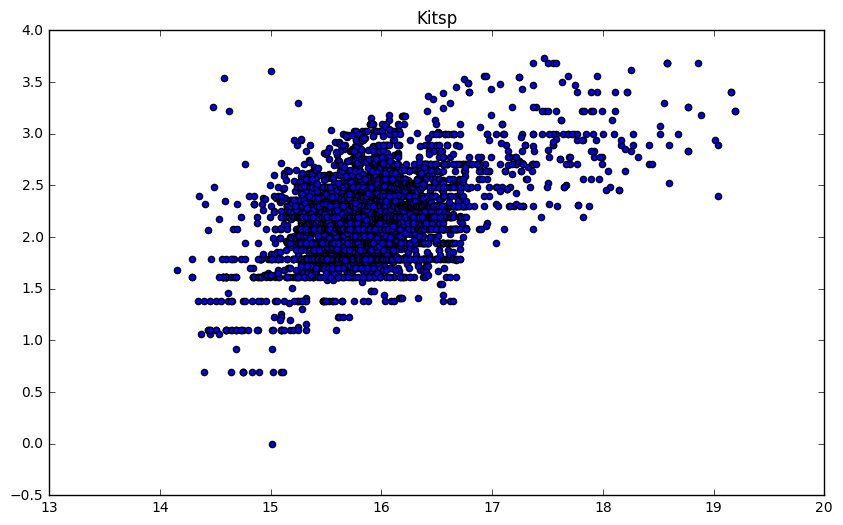

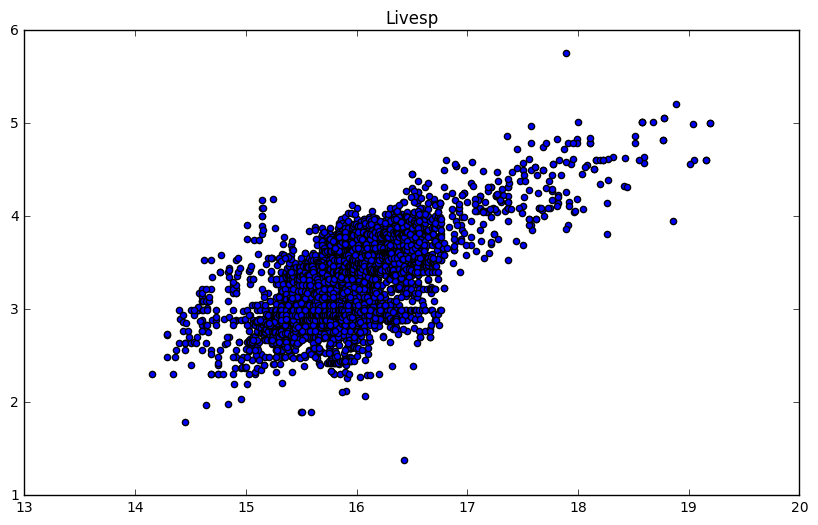

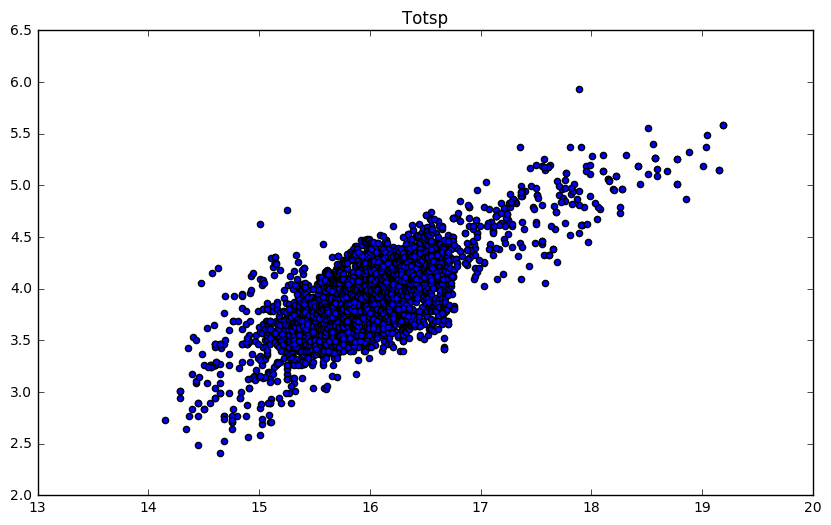

In [87]:
for colname in floatcols:
    pylab.figure(figsize = (10, 6))
    pylab.scatter(data_cleaned.Price.apply(np.log), data_cleaned[colname].apply(np.log))
    pylab.title(colname)

## Что ж, неплохо. Логарифмированные вещественные признаки следует включать в прогнозирующую модель.

### Теперь взглянем на то, как сказываются бинарные признаки на стоимости.

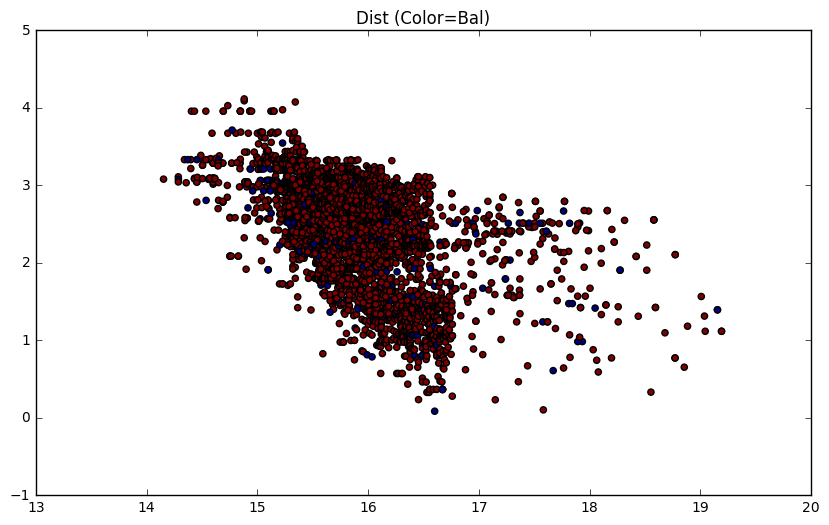

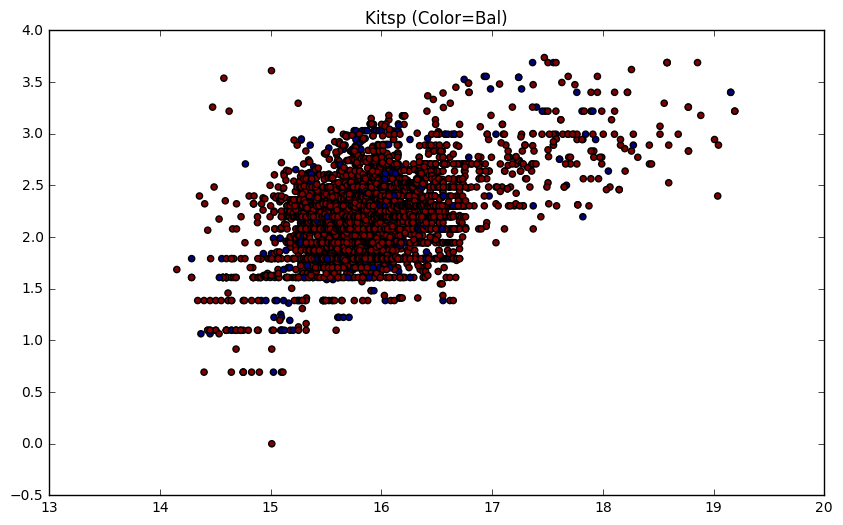

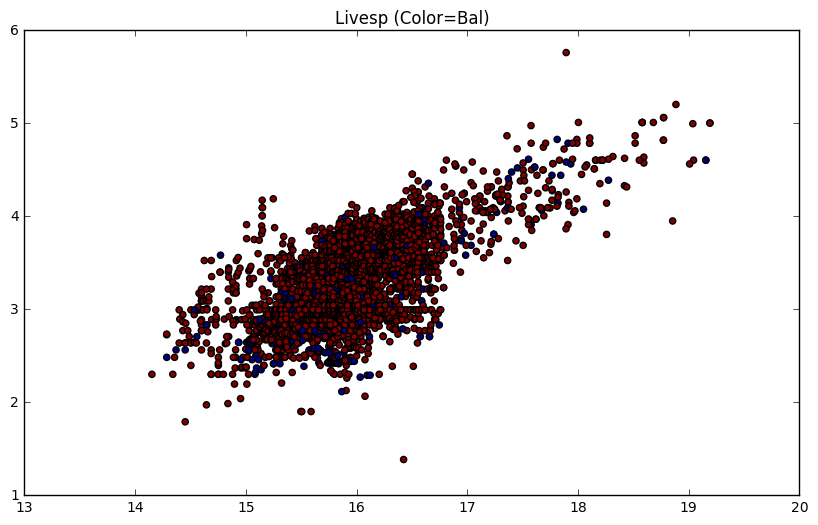

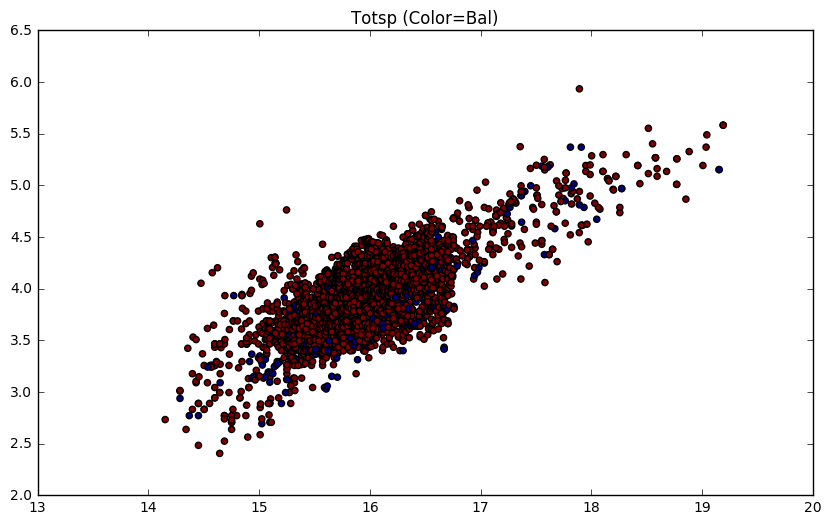

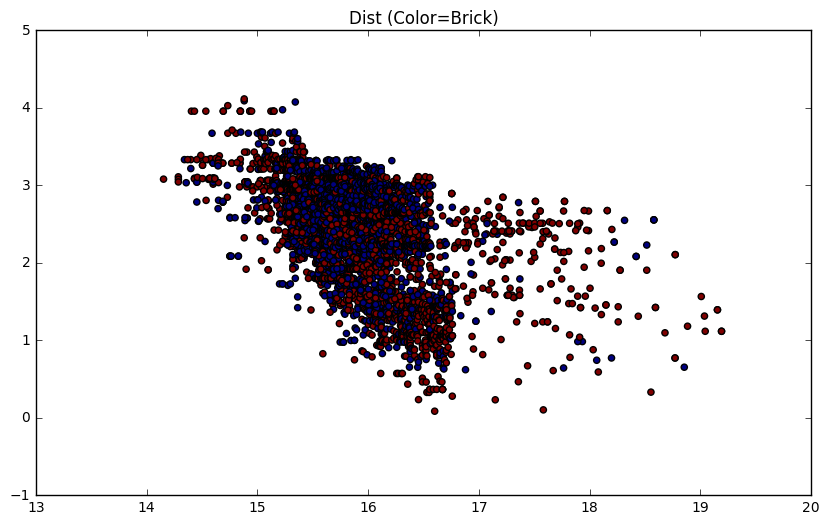

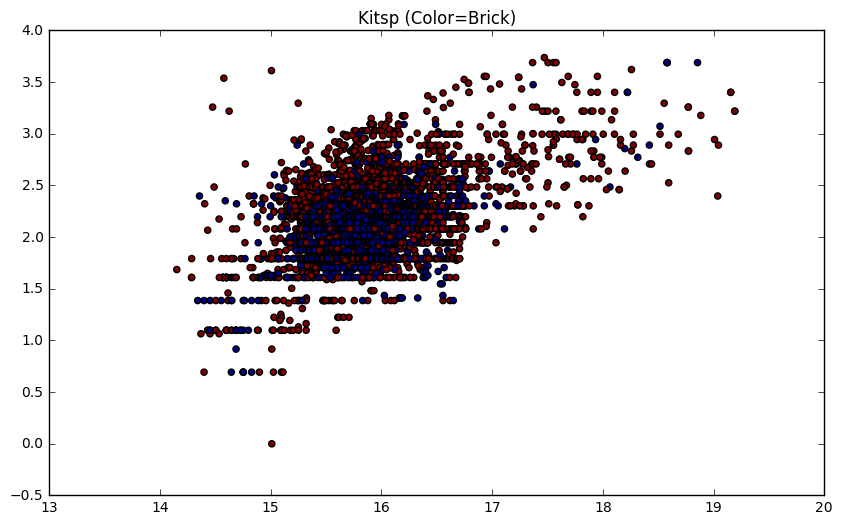

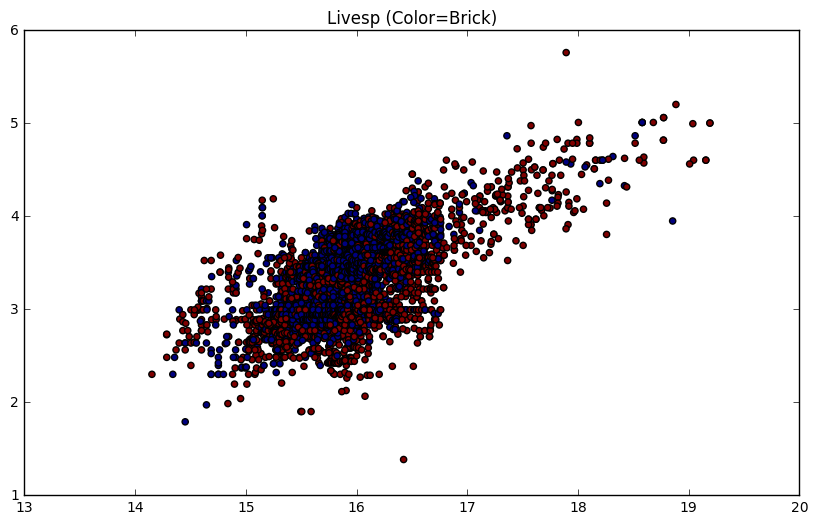

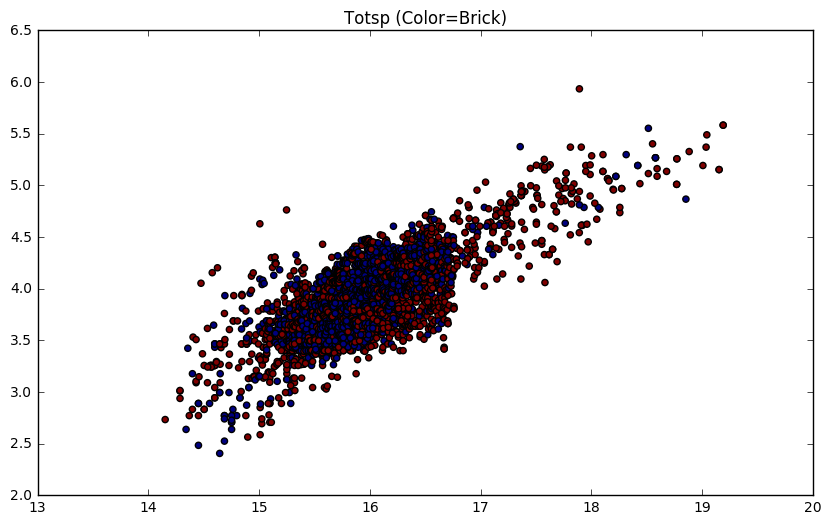

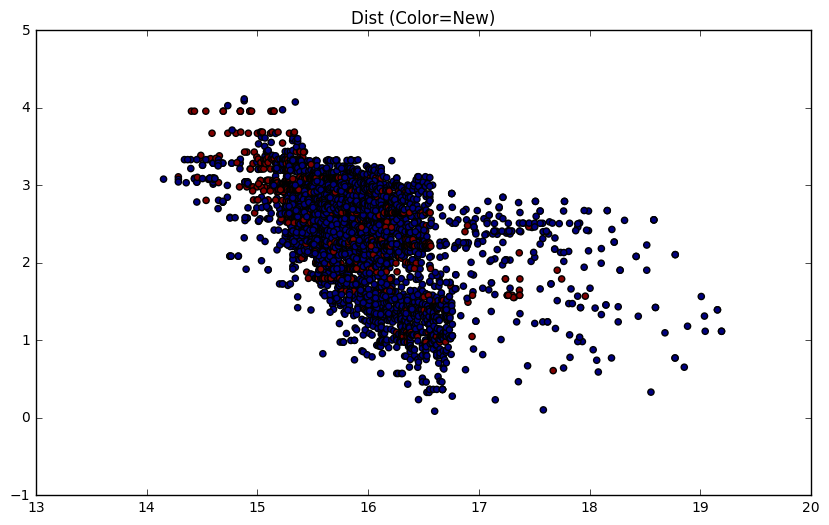

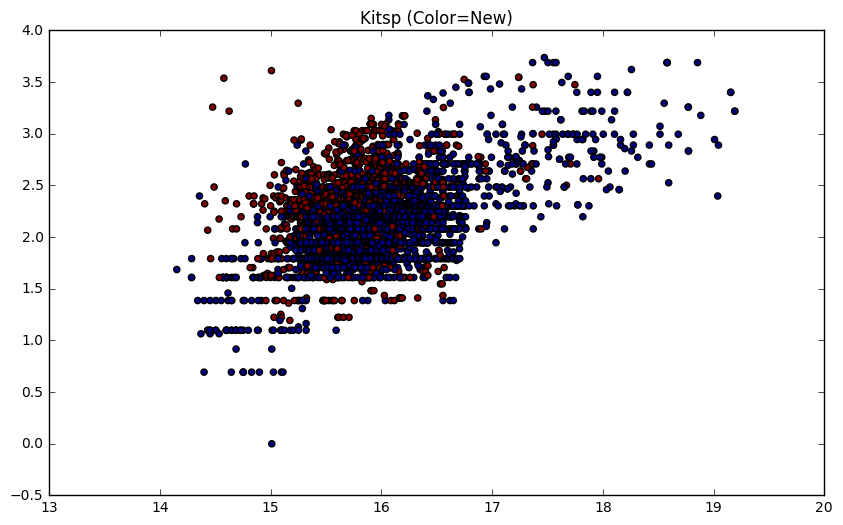

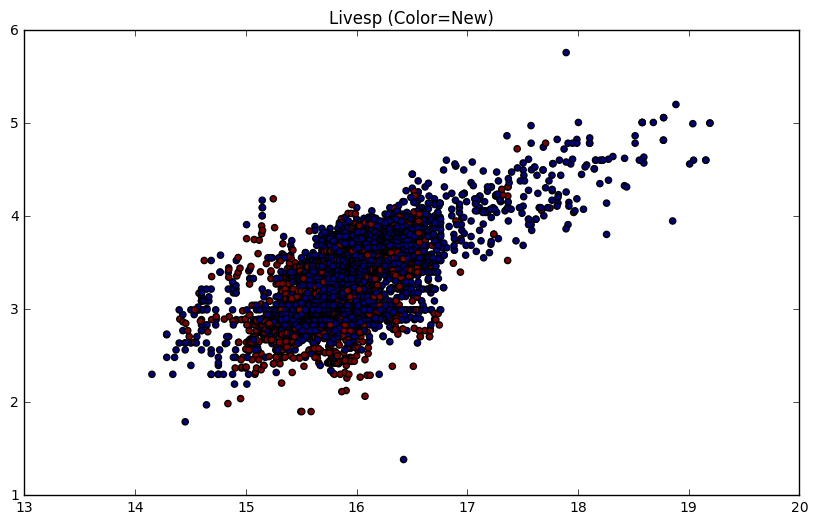

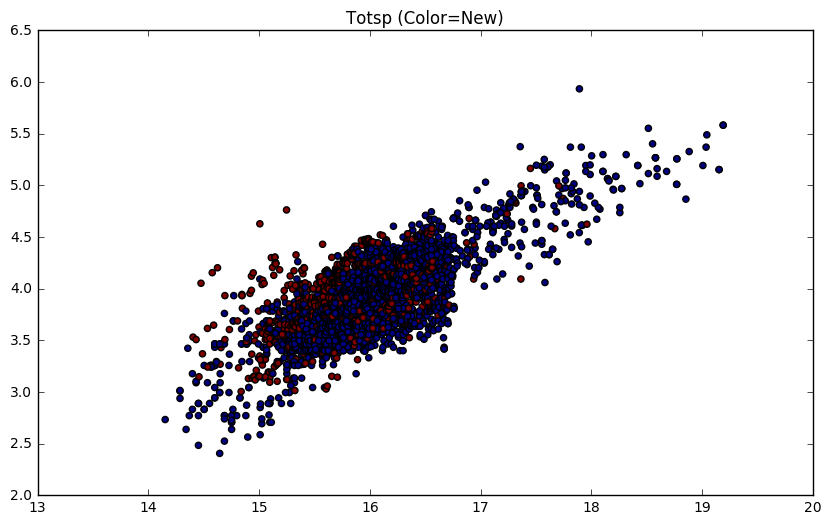

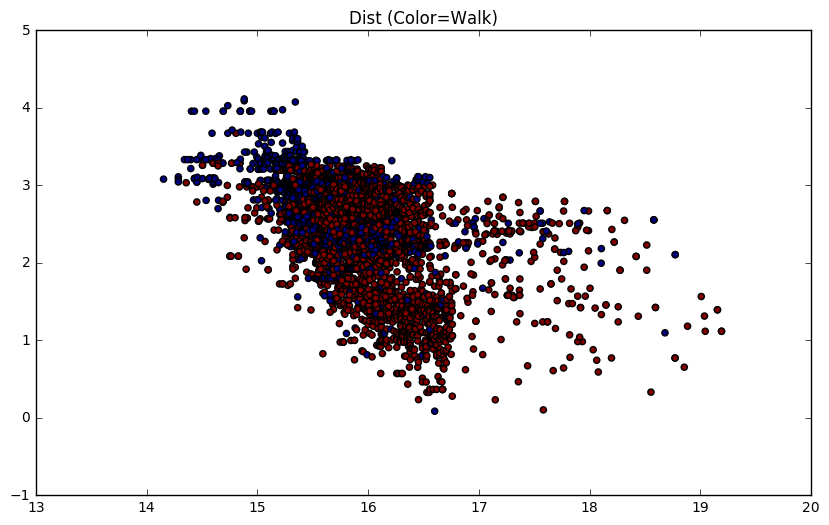

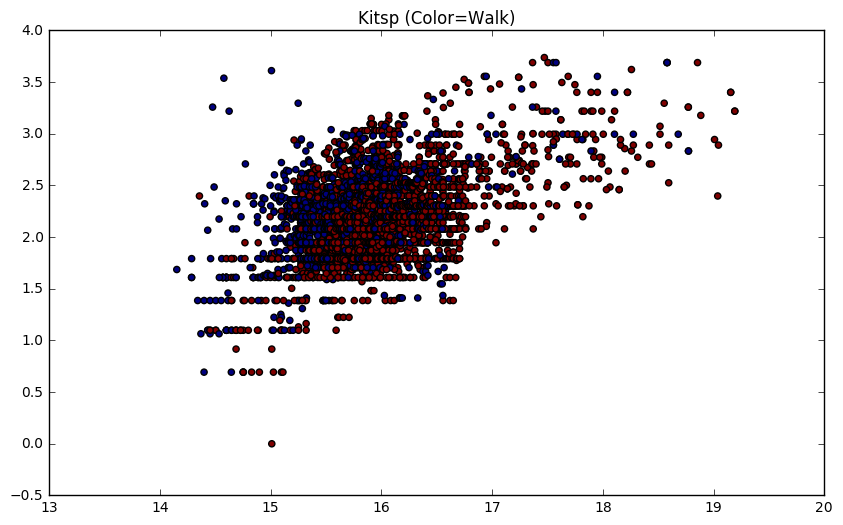

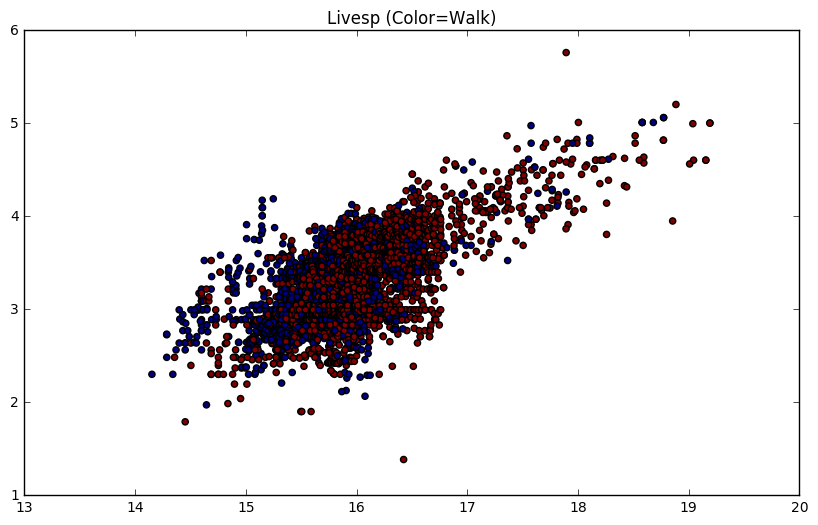

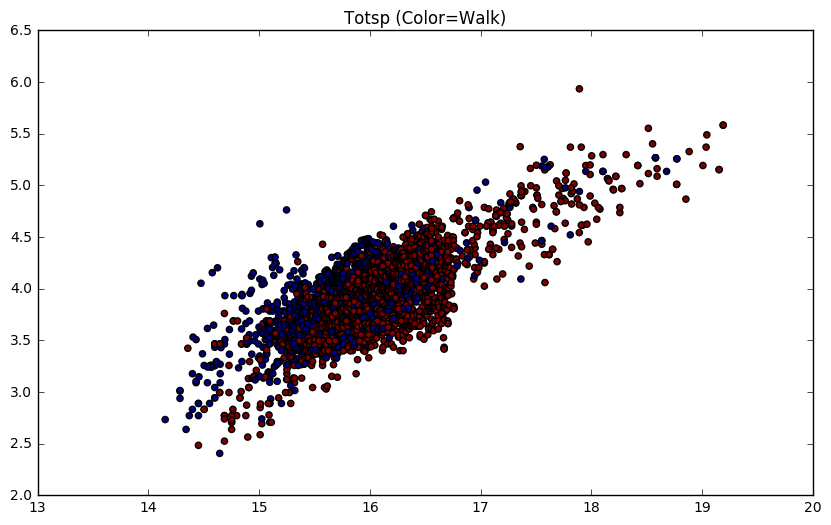

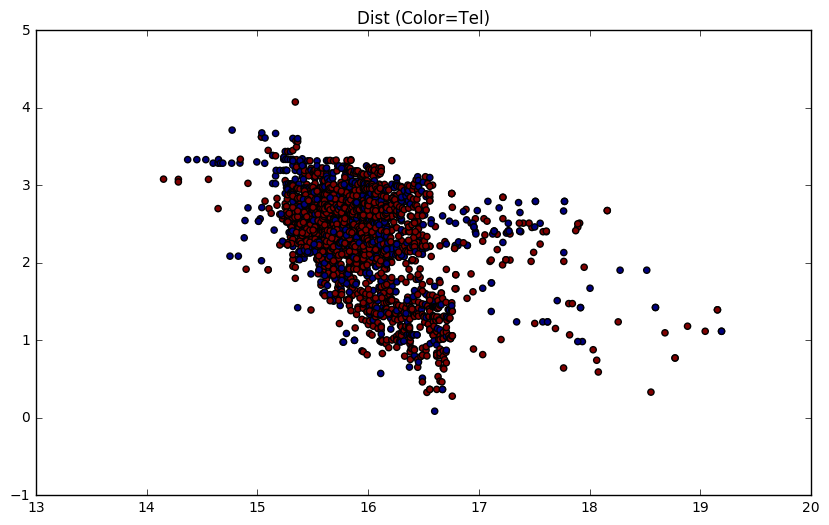

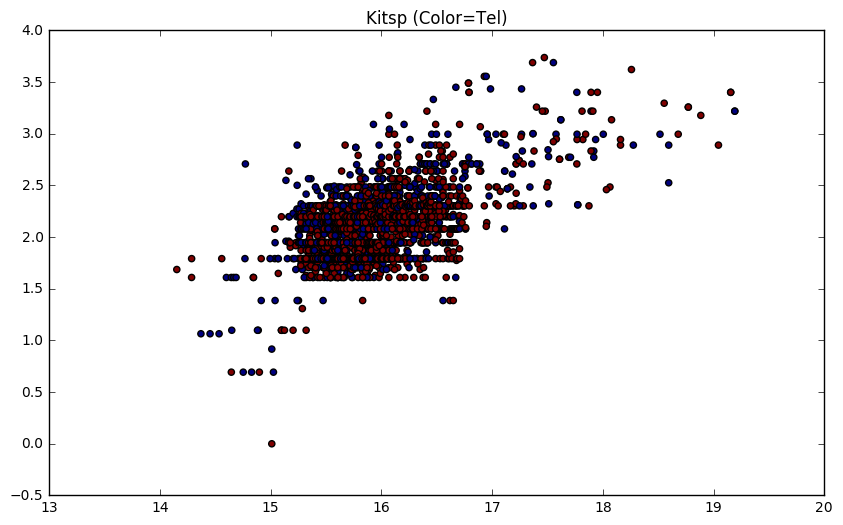

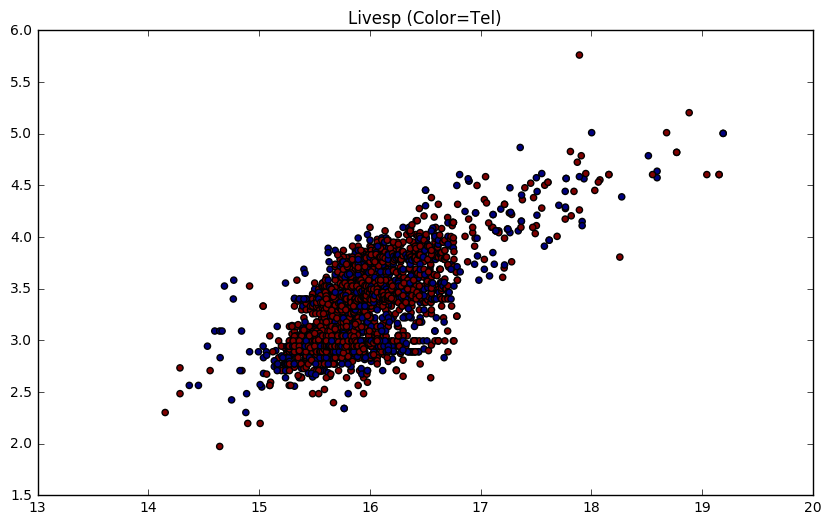

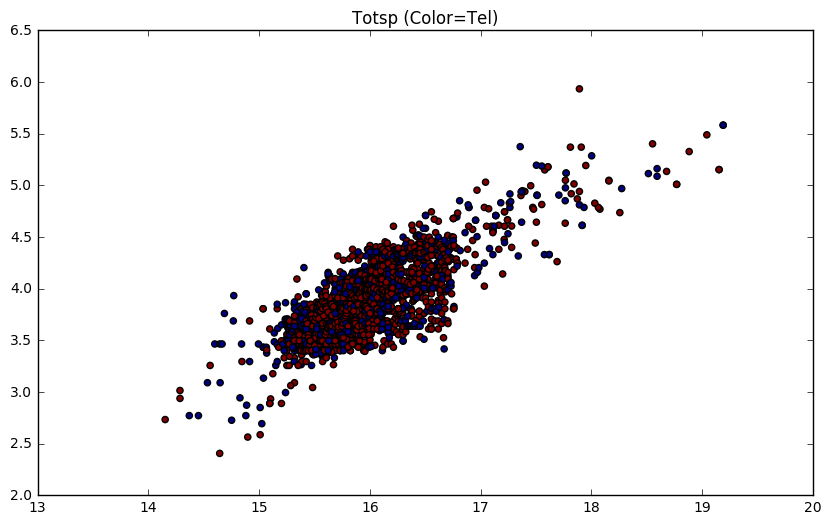

In [92]:
for bincolname in bincols:
    for colname in floatcols:
        pylab.figure(figsize = (10, 6))
        pylab.scatter(data_cleaned.Price.apply(np.log), data_cleaned[colname].apply(np.log), c = data_cleaned[bincolname])
        pylab.title(colname+' (Color='+bincolname+')')

### Видно, что наличие телефона не имеет большого значения - у всех уже есть мобильные. Смело можно выкидывать.

In [94]:
data_cleaned = data_cleaned.drop('Tel', 1)
bincols = ['Bal', 'Brick', 'New', 'Walk']
for colname in floatcols:
    data_cleaned[colname] = data_cleaned[colname].apply(np.log)

### Попробуем оценить, сколько комнат с точки зрения цен укладывается в студии или в свободной планировке. Для этого будем предсказывать количество комнат в зависимости от цены, обучая на остальных данных логистическую регрессию.

In [99]:
from sklearn.linear_model import LinearRegression as LR

In [114]:
lr = LR()
lr.fit(data_cleaned[data_cleaned.Rooms<6].Price.apply(np.log).values.reshape(5706, 1), data_cleaned[data_cleaned.Rooms<6].Rooms.values)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [115]:
lr.predict(data_cleaned[data_cleaned.Rooms==6].Price.apply(np.log).values.reshape(11, 1)).mean()

2.4054873287075575

In [116]:
lr.predict(data_cleaned[data_cleaned.Rooms==7].Price.apply(np.log).values.reshape(37, 1)).mean()

0.84676756715375601

In [117]:
def room(r):
    if r<6:
        return r
    if r==6:
        return 2.4054873287075575
    return 0.84676756715375601
data_cleaned.Rooms = data_cleaned.Rooms.apply(room)

### Walk, Dist, Metrdist - пожалуй, достаточно данных для извлечения зависимости от геолокации. Попробуем выкинуть District, тем более что в задании такое поле было не обязательным.

In [120]:
data_cleaned = data_cleaned.drop('District', 1)

In [121]:
data_cleaned.head()

Bal  Brick      Dist  Floor     Kitsp    Livesp  Metrdist  New  Nfloor  \
0    1      1  0.592859      4  3.135494  4.553877       7.0    0     8.0   
1    1      1  1.239630      6  3.621671  3.806662       9.0    0    14.0   
2    1      1  0.781791      7  2.564949  4.234107       6.0    0     8.0   
3    1      1  3.381916      2  2.079442  2.760010      20.0    1     4.0   
4    1      1  3.068028      2  2.468100  3.600048      15.0    1    19.0   

      Price  Rooms     Totsp  Walk  
0  71014225    3.0  4.770685   1.0  
1  85000000    3.0  4.737075   1.0  
2  55000000    3.0  4.820282   1.0  
3   2316750    1.0  3.430756   0.0  
4   3650000    2.0  4.301359   0.0

In [124]:
data_cleaned.describe().T

count          mean           std           min           25%  \
Bal       5754.0  9.181439e-01  2.741692e-01  0.000000e+00  1.000000e+00   
Brick     5754.0  4.598540e-01  4.984290e-01  0.000000e+00  0.000000e+00   
Dist      5754.0  2.431488e+00  5.782113e-01  8.702716e-02  2.187919e+00   
Floor     5754.0  7.093848e+00  5.788847e+00  1.000000e+00  3.000000e+00   
Kitsp     5754.0  2.159514e+00  3.739359e-01  0.000000e+00  1.871802e+00   
Livesp    5754.0  3.267184e+00  4.277370e-01  1.386294e+00  2.944439e+00   
Metrdist  5754.0  1.098731e+01  6.249938e+00  1.000000e+00  7.000000e+00   
New       5754.0  2.273201e-01  4.191375e-01  0.000000e+00  0.000000e+00   
Nfloor    5754.0  1.382517e+01  7.835282e+00  1.000000e+00  9.000000e+00   
Price     5754.0  9.738936e+06  1.199036e+07  1.399444e+06  5.800000e+06   
Rooms     5754.0  1.739275e+00  7.947633e-01  8.467676e-01  1.000000e+00   
Totsp     5754.0  3.852422e+00  3.492929e-01  2.406945e+00  3.637586e+00   
Walk      5754.0  6.962113e-01  4.599325e-01  0.000000e+00  0.000000e+00   

                   50%           75%           max  
Bal       1.000000e+00  1.000000e+00  1.000000e+00  
Brick     0.000000e+00  1.000000e+00  1.000000e+00  
Dist      2.563464e+00  2.798027e+00  4.116403e+00  
Floor     5.000000e+00  1.000000e+01  4.500000e+01  
Kitsp     2.151762e+00  2.332144e+00  3.737670e+00  
Livesp    3.258097e+00  3.526361e+00  5.762051e+00  
Metrdist  1.000000e+01  1.500000e+01  5.400000e+01  
New       0.000000e+00  0.000000e+00  1.000000e+00  
Nfloor    1.200000e+01  1.700000e+01  7.700000e+01  
Price     7.465245e+06  9.850000e+06  2.161302e+08  
Rooms     2.000000e+00  2.000000e+00  5.000000e+00  
Totsp     3.804438e+00  4.043051e+00  5.934894e+00  
Walk      1.000000e+00  1.000000e+00  1.000000e+00

## Сохраняем очищенные данные

In [125]:
data_cleaned.to_csv("data_cleaned.csv")